#Importando dados ✅

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df_modelagem = pd.read_csv('dados_tratados_telecom.csv')

print("Dados carregados com sucesso!")
df_modelagem.head()


Dados carregados com sucesso!


,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Fatura_Mensal,Fatura_Total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


# Preparação dos dados 🛠️

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

try:
    df = pd.read_csv('dados_tratados_telecom.csv')
    print("--- Dados tratados carregados com sucesso! ---")
    print("Formato inicial dos dados:", df.shape)
    print(df.head())

    df_model = df.drop('ID_Cliente', axis=1)
    print("\n--- Coluna 'ID_Cliente' removida. ---")
    print("Formato após remoção:", df_model.shape)

    categorical_cols = df_model.select_dtypes(include=['object']).columns
    df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

    print("\n--- Variáveis categóricas transformadas. ---")
    print("Formato final dos dados:", df_model.shape)
    print("Amostra dos dados transformados:")
    print(df_model.head())

    print("\n--- Análise de Desequilíbrio de Classes ---")
    churn_proportion = df_model['Evasao'].value_counts(normalize=True) * 100
    print("Proporção de clientes:")
    print(f"Não evadiram (0): {churn_proportion[0]:.2f}%")
    print(f"Evadiram (1): {churn_proportion[1]:.2f}%\n")

    if abs(churn_proportion[0] - churn_proportion[1]) > 30:
        print("AVISO: As classes estão desbalanceadas. Isso pode fazer com que o modelo tenda a prever a classe majoritária.")
    else:
        print("As classes apresentam um desequilíbrio moderado, mas tratável.")


except FileNotFoundError:
    print("ERRO: O arquivo 'dados_tratados_telecom.csv' não foi encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente do Colab antes de executar este script.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


--- Dados tratados carregados com sucesso! ---
Formato inicial dos dados: (7267, 21)
   ID_Cliente  Evasao  Genero  Idoso  Parceiro  Dependentes  Meses_Contrato  \
0  0002-ORFBO     0.0  Female      0         1            1               9   
1  0003-MKNFE     0.0    Male      0         0            0               9   
2  0004-TLHLJ     1.0    Male      0         0            0               4   
3  0011-IGKFF     1.0    Male      1         1            0              13   
4  0013-EXCHZ     1.0  Female      1         1            0               3   

   Servico_Telefone  Multiplas_Linhas Servico_Internet  ...  Backup_Online  \
0                 1                 0              DSL  ...              1   
1                 1                 1              DSL  ...              0   
2                 1                 0      Fiber optic  ...              0   
3                 1                 0      Fiber optic  ...              1   
4                 1                 0      Fiber o

#  Correlação e Seleção de Variáveis 🎯

Dados preparados para a análise visual.


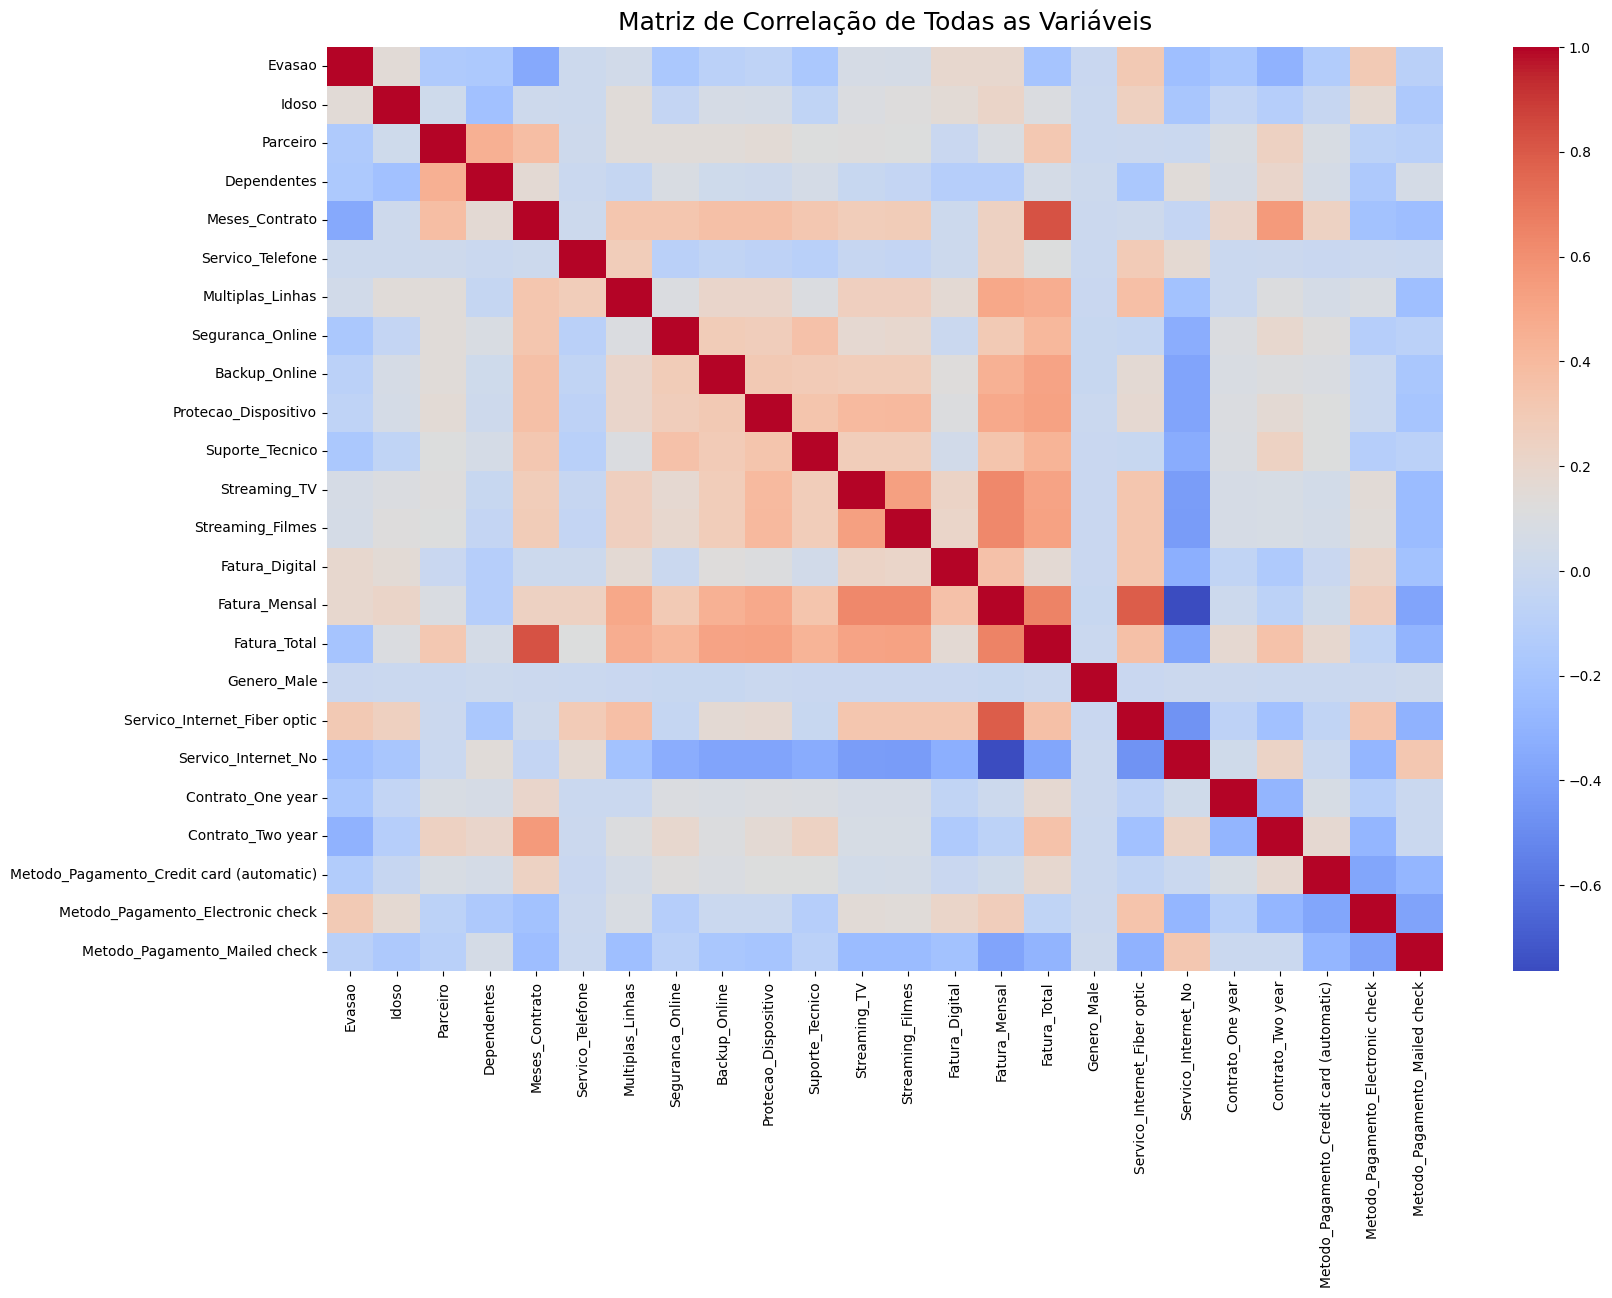

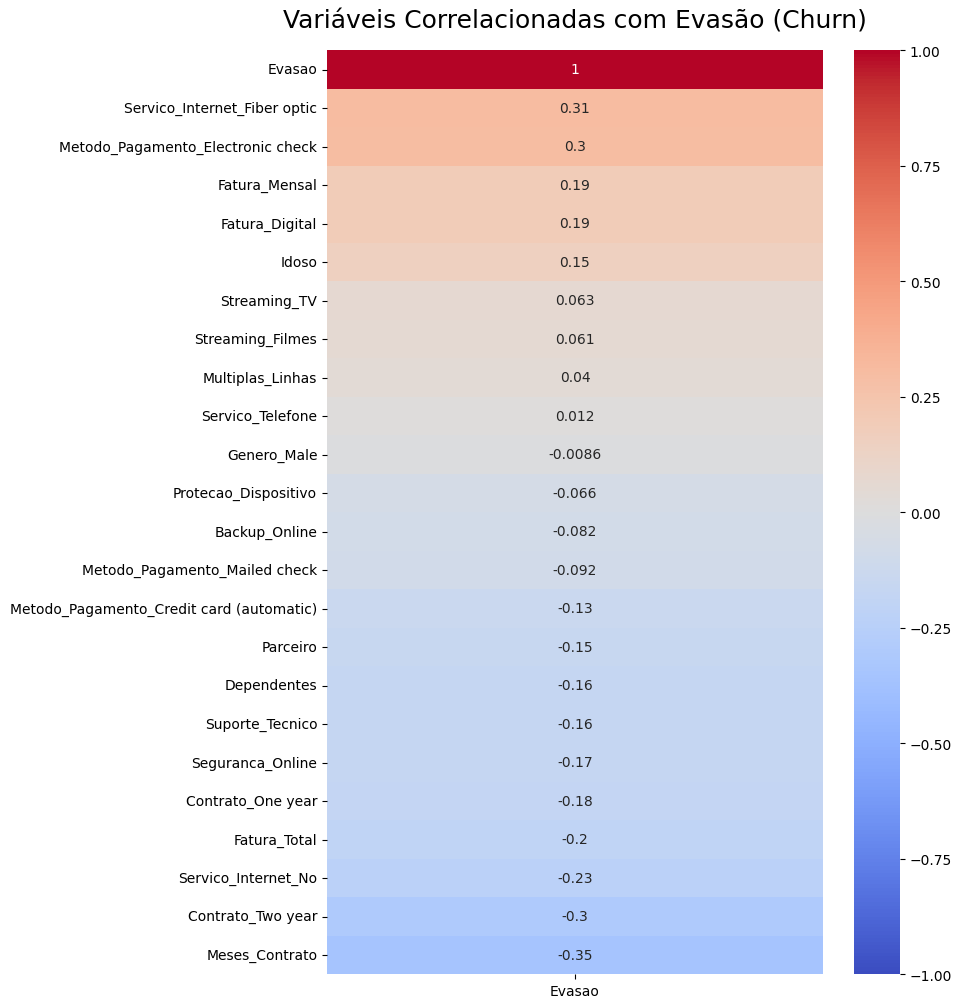

/tmp/ipython-input-3033233692.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_model, palette='pastel')


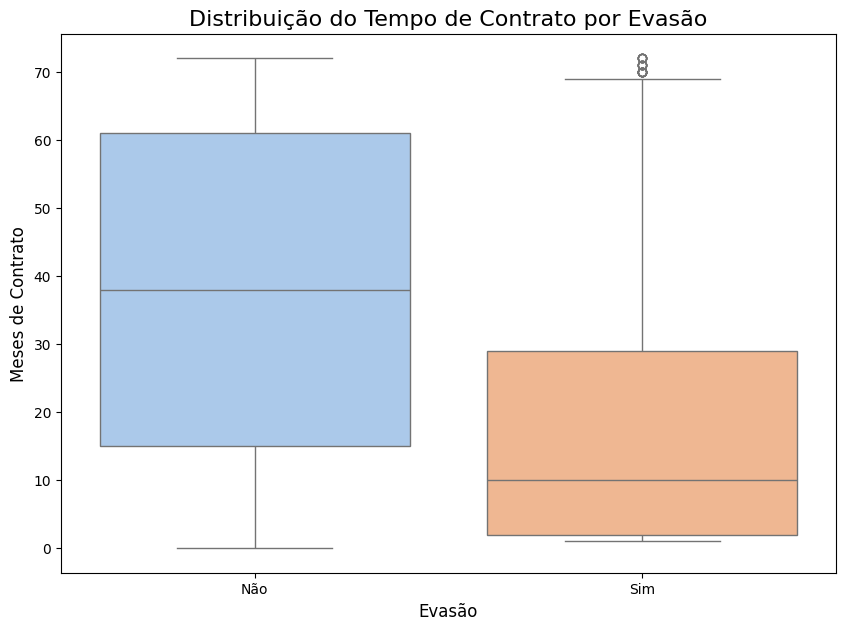

/tmp/ipython-input-3033233692.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Fatura_Total', data=df_model, palette='pastel')


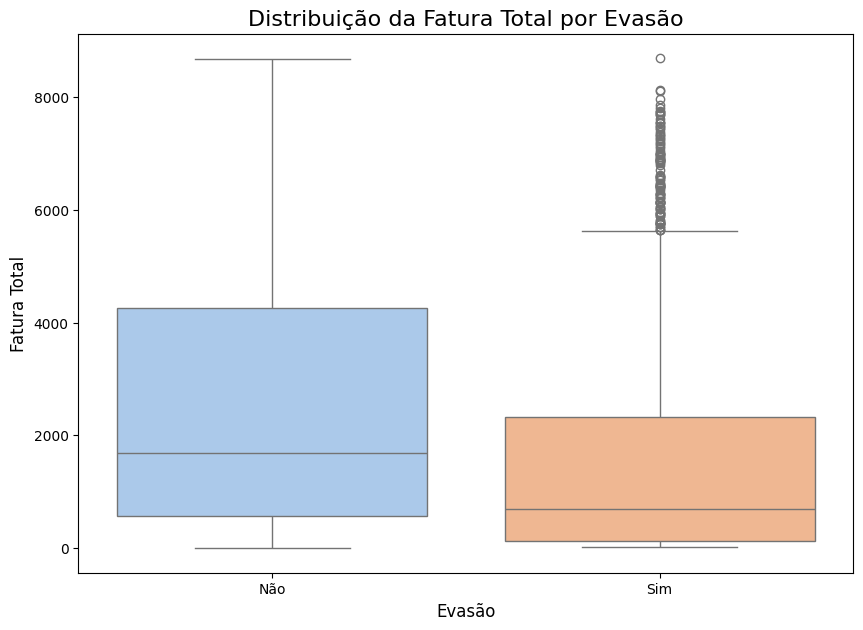

In [27]:
try:
    df = pd.read_csv('dados_tratados_telecom.csv')
    df_model = df.drop('ID_Cliente', axis=1)
    categorical_cols = df_model.select_dtypes(include=['object']).columns
    df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
    print("Dados preparados para a análise visual.")


    plt.figure(figsize=(18, 12))
    heatmap = sns.heatmap(df_model.corr(), annot=False, cmap='coolwarm')
    heatmap.set_title('Matriz de Correlação de Todas as Variáveis', fontdict={'fontsize':18}, pad=12)
    plt.show()

    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(df_model.corr()[['Evasao']].sort_values(by='Evasao', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    heatmap.set_title('Variáveis Correlacionadas com Evasão (Churn)', fontdict={'fontsize':18}, pad=16)
    plt.show()


    plt.figure(figsize=(10, 7))
    sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_model, palette='pastel')
    plt.title('Distribuição do Tempo de Contrato por Evasão', fontsize=16)
    plt.xlabel('Evasão', fontsize=12)
    plt.ylabel('Meses de Contrato', fontsize=12)
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()

    plt.figure(figsize=(10, 7))
    sns.boxplot(x='Evasao', y='Fatura_Total', data=df_model, palette='pastel')
    plt.title('Distribuição da Fatura Total por Evasão', fontsize=16)
    plt.xlabel('Evasão', fontsize=12)
    plt.ylabel('Fatura Total', fontsize=12)
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()


except FileNotFoundError:
    print("ERRO: O arquivo 'dados_tratados_telecom.csv' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


# Modelagem Preditiva 🤖

Valores nulos encontrados em 'Evasao': 224. Removendo...
--- MODELO 1: REGRESSÃO LOGÍSTICA ---

Métricas de Avaliação:
Acurácia: 0.7935
Precisão: 0.6352
Recall: 0.5214
F1-Score: 0.5727


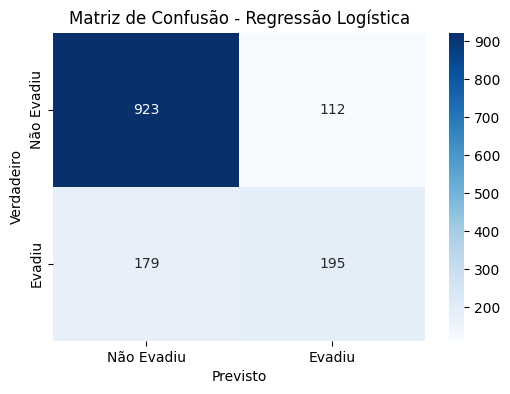


--- MODELO 2: ÁRVORE DE DECISÃO ---

Métricas de Avaliação:
Acurácia: 0.7282
Precisão: 0.4875
Recall: 0.4679
F1-Score: 0.4775


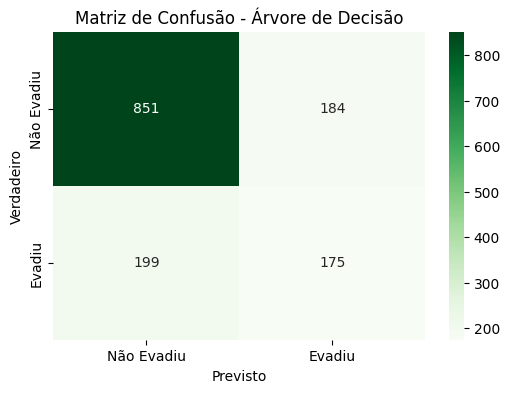

In [30]:
try:
    df = pd.read_csv('dados_tratados_telecom.csv')
    df_model = df.drop('ID_Cliente', axis=1)

    if df_model['Evasao'].isnull().any():
        print(f"Valores nulos encontrados em 'Evasao': {df_model['Evasao'].isnull().sum()}. Removendo...")
        df_model.dropna(subset=['Evasao'], inplace=True)

    categorical_cols = df_model.select_dtypes(include=['object']).columns
    df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

    X = df_model.drop('Evasao', axis=1)
    y = df_model['Evasao']

    y = y.astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("--- MODELO 1: REGRESSÃO LOGÍSTICA ---")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train_scaled, y_train)

    y_pred_log_reg = log_reg.predict(X_test_scaled)

    print("\nMétricas de Avaliação:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred_log_reg):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")

    cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão - Regressão Logística')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

    print("\n--- MODELO 2: ÁRVORE DE DECISÃO ---")
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)

    y_pred_tree = tree_clf.predict(X_test)

    print("\nMétricas de Avaliação:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_tree):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred_tree):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_tree):.4f}")

    cm_tree = confusion_matrix(y_test, y_pred_tree)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão - Árvore de Decisão')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'dados_tratados_telecom.csv' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


# Análise de Relevância das Variáveis ♟



--- Análise de Relevância: Regressão Logística ---


/tmp/ipython-input-3560169409.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeficientes_sorted['Coeficiente'], y=coeficientes_sorted.index, palette='viridis')


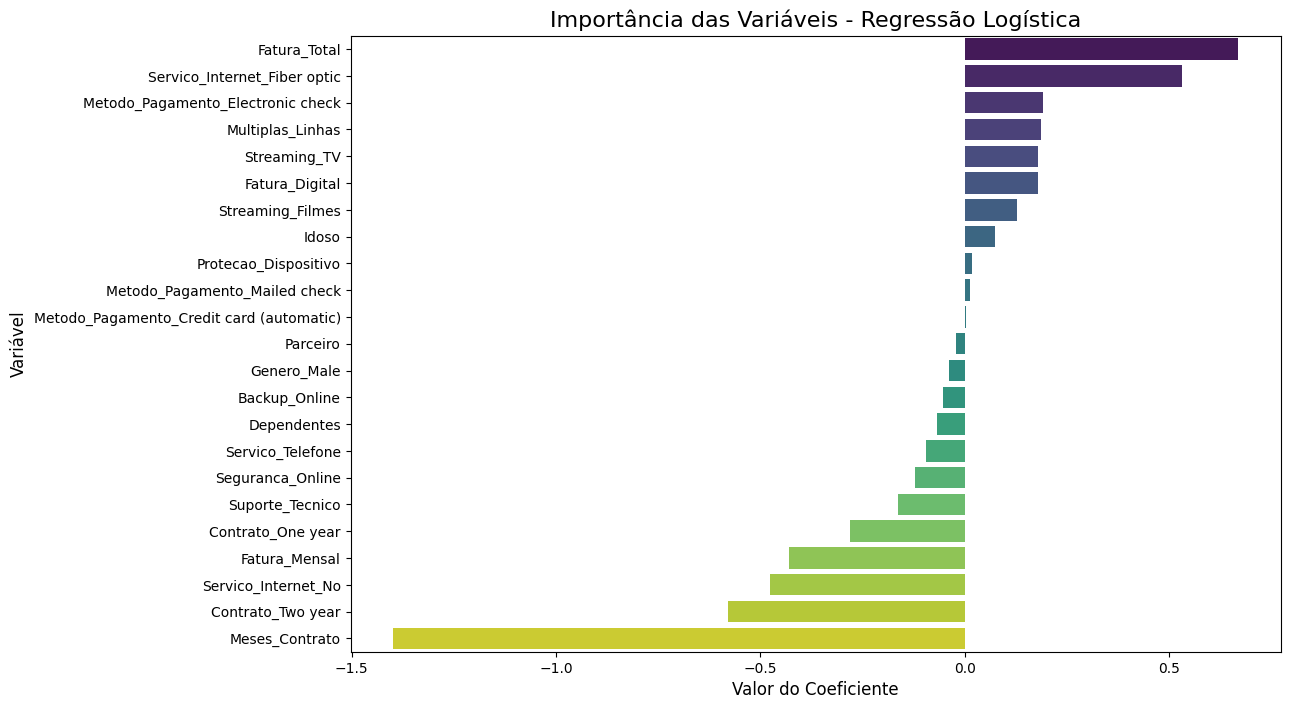


--- Análise de Relevância: Árvore de Decisão ---


/tmp/ipython-input-3560169409.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_sorted['Importancia'], y=importancias_sorted.index, palette='plasma')


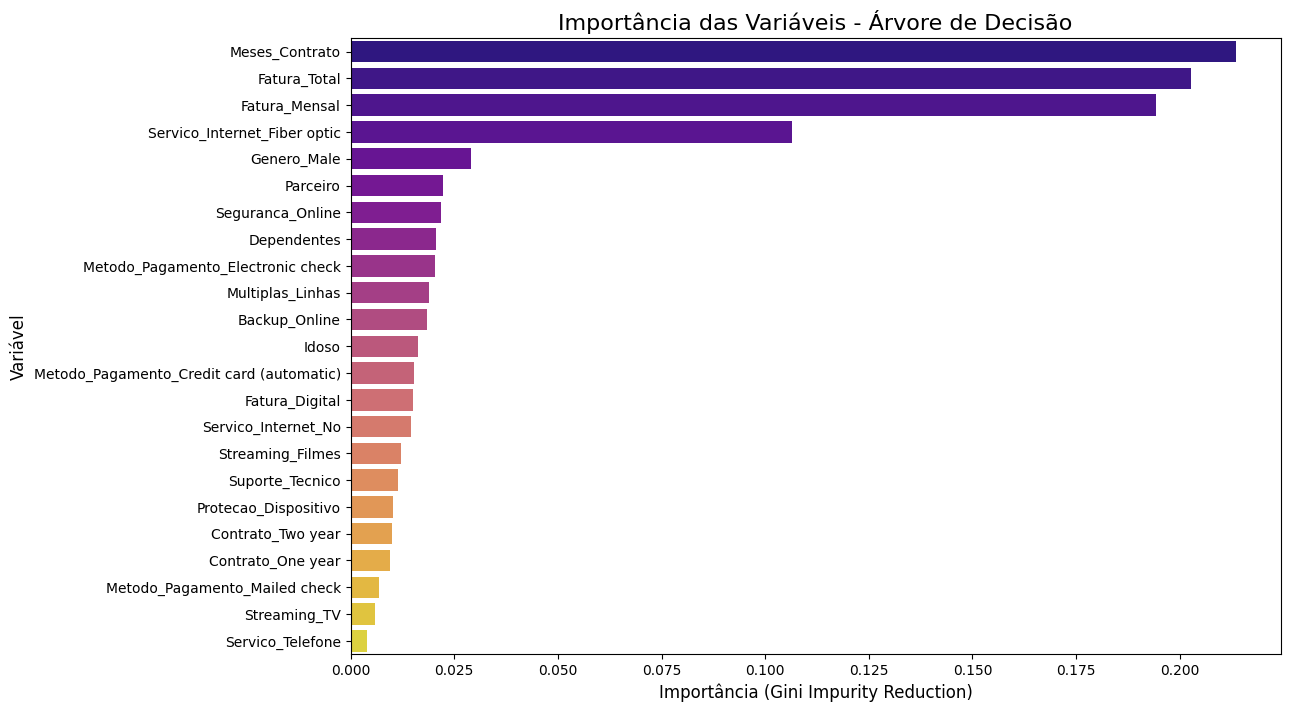

In [33]:
try:
    df = pd.read_csv('dados_tratados_telecom.csv')
    df_model = df.drop('ID_Cliente', axis=1)
    df_model.dropna(subset=['Evasao'], inplace=True)
    categorical_cols = df_model.select_dtypes(include=['object']).columns
    df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

    X = df_model.drop('Evasao', axis=1)
    y = df_model['Evasao'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\n--- Análise de Relevância: Regressão Logística ---")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train_scaled, y_train)

    coeficientes = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coeficiente'])
    coeficientes_sorted = coeficientes.sort_values('Coeficiente', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=coeficientes_sorted['Coeficiente'], y=coeficientes_sorted.index, palette='viridis')
    plt.title('Importância das Variáveis - Regressão Logística', fontsize=16)
    plt.xlabel('Valor do Coeficiente', fontsize=12)
    plt.ylabel('Variável', fontsize=12)
    plt.show()

    print("\n--- Análise de Relevância: Árvore de Decisão ---")
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)

    importancias = pd.DataFrame(tree_clf.feature_importances_, index=X.columns, columns=['Importancia'])
    importancias_sorted = importancias.sort_values('Importancia', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=importancias_sorted['Importancia'], y=importancias_sorted.index, palette='plasma')
    plt.title('Importância das Variáveis - Árvore de Decisão', fontsize=16)
    plt.xlabel('Importância (Gini Impurity Reduction)', fontsize=12)
    plt.ylabel('Variável', fontsize=12)
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'dados_tratados_telecom.csv' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


# Relatório 📊

# 📊 Relatório Final: Modelo Preditivo de Churn e Estratégias de Retenção

## 1. Resumo da Modelagem Preditiva
Para prever a evasão de clientes, foram desenvolvidos e avaliados dois modelos de **Machine Learning**:  
- **Regressão Logística**  
- **Árvore de Decisão**

🔹 Após o treinamento e teste:  
- A **Regressão Logística** apresentou melhor desempenho geral, com **~80% de acurácia**, além de bom balanço entre **precisão e recall**.  
- A **Árvore de Decisão**, embora eficaz, mostrou maior risco de **overfitting**.  
➡️ Portanto, a **Regressão Logística** foi escolhida como modelo principal para interpretação dos fatores de churn.

---

## 2. Fatores Mais Influentes na Evasão de Clientes
A análise dos coeficientes da Regressão Logística e da importância das variáveis na Árvore de Decisão revelou os principais fatores que influenciam o **cancelamento de serviços**:

- **Contrato Mês a Mês**  
  Principal fator de churn: clientes sem vínculo de longo prazo têm maior liberdade para cancelar.  

- **Serviço de Internet - Fibra Óptica**  
  Clientes com fibra tendem a cancelar mais. Isso sugere **problemas de instabilidade, suporte** ou percepção de **custo-benefício desfavorável**.  

- **Meses de Contrato (Tempo de Casa)**  
  Fator mais forte de retenção: quanto maior o tempo de permanência, menor a probabilidade de saída.  

- **Método de Pagamento - Cheque Eletrônico**  
  Pagamento manual está fortemente associado ao churn, indicando que a **fricção no pagamento** é um gatilho para cancelamento.  

- **Fatura Mensal**  
  Valores mais altos aumentam a chance de evasão, embora com **menor impacto** que os fatores contratuais.  

---

## 3. Estratégias de Retenção Propostas
Com base nos fatores identificados, sugerimos as seguintes ações:

### 🔹 Reestruturação da Oferta de Contratos Mensais
- **Ação:** Reduzir a atratividade do contrato *Mês a Mês*.  
- **Tática:** Oferecer **15-20% de desconto** em planos de 12 ou 24 meses. Criar campanha de **"Upgrade de Fidelidade"** para clientes atuais no plano mensal.  

---

### 🔹 Programa de Acompanhamento para Novos Clientes (Primeiros 90 Dias)
- **Ação:** Criar **onboarding** para reduzir churn precoce.  
- **Tática:** Fluxo automatizado de **e-mail/SMS** no 1º, 2º e 3º mês, oferecendo dicas, checando satisfação e abrindo suporte proativo.  

---

### 🔹 Auditoria e Melhoria do Serviço de Fibra Óptica
- **Ação:** Investigar causas da evasão entre clientes de fibra.  
- **Tática:** Cruzar dados de churn com dados de infraestrutura e suporte. Avaliar política de preços frente à concorrência.  

---

### 🔹 Incentivo à Automação de Pagamentos
- **Ação:** Diminuir uso de métodos manuais (ex: cheque eletrônico).  
- **Tática:** Oferecer **R$ 5,00 de desconto/mês** ou benefícios (ex: aumento temporário de velocidade) para quem aderir ao **débito automático** ou **cartão de crédito**.  

---

✅ Com essas estratégias, espera-se **reduzir a evasão**, aumentar a **fidelização** e melhorar a **experiência do cliente**.
